#### Exploring Data With Python (Cont)


#### Mathmatical Topics Covered

1.  Quantitative Data 
2.  Basic visualizations (Stem and Leaf displays, Histograms)
3.  Cross Tabulation - Mean, Median, Mode
4.  Standard Deviation
5.  Percentiles, Quartiles, Quintiles, Deciles 
6.  Plotting (Elementry box plot)
7.  IQR (interquartile range) - Box Plots (tradition/modified) - including upper/lower limits and outlier

#### Python Libraries

1. [numpy](https://numpy.org/)
2. [pandas](https://pandas.pydata.org/)
3. [matplotlib](https://matplotlib.org/)
4. [stemgraphic](http://stemgraphic.org/doc/intro.html)

In [1]:
# import libraries using standard abbreviations
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from stemgraphic.alpha import stem_graphic

print("Library Versions")
print("numpy version: {}".format(np.__version__))
print("pandas version: {}".format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Library Versions
numpy version: 1.22.1
pandas version: 1.3.5
matplotlib: 3.5.1


### Loading Datasets

|Dataset|Remarks|
|-------|-------|
|Flight Data| Information about airline flight arrivals|and depatures


In [2]:
# Load Amtrak data set (csv file) into a pandas dataframe
flight_df = pd.read_csv (r'flight_data.csv')

flight_df.head(10)  #Take a quick peak at the information to amke sure it loaded.

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,1/1/2013 5:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,1/1/2013 6:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,1/1/2013 6:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,1/1/2013 6:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,1/1/2013 6:00


### Examining Dataset Head

Before getting started with the flight_data a few things can be observed just looking at the first few rows.

1. Series dep_time, arr_time, dep_delay, arr_delay, and air_time were all imported as floats.
2. All time is store as a number that was converted from a string, excent in the series time_hour, hour, minute.  For example: 8:15 PM is stored as 815.
3. Time has been store using a 24 hour clock.

### Correcting the data types

Before proceeding with our investigation correcting the datatype will be accomplished.  Conversion from float to int will be demonstrated, this article [10 tricks for converting Data to a Numeric Type in Pandas](https://towardsdatascience.com/converting-data-to-a-numeric-type-in-pandas-db9415caab0b) discussed type converstion in much more detail.

### Start by Examining

In [12]:
# get the data type for each series
flight_df.dtypes


year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

The **info()** method may be more useful as it provides [RangeIndex](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.RangeIndex.html), total columns, non-null count, dtypes, and memory usage.

This returns a data frame. 

In [13]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

### Convert Single Series

*Note it has a capital I and is different than Numpy 'int64'. What this does is change Numpy’s NaN to Pandas’ NA and this allows it to be an integer.*

In [21]:
flight_df['dep_time'] = flight_df['dep_time'].astype('Int64')
# flight_df.info()

### Convert Multiple Series

In [24]:
# Convertnig multiple columns at once
flight_df = flight_df.astype({
    'dep_delay': 'Int64',
    'arr_time': 'Int64',
    'arr_delay': 'Int64',
    'air_time': 'Int64'   
})

In [25]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year            336776 non-null  int64 
 1   month           336776 non-null  int64 
 2   day             336776 non-null  int64 
 3   dep_time        328521 non-null  Int64 
 4   sched_dep_time  336776 non-null  int64 
 5   dep_delay       328521 non-null  Int64 
 6   arr_time        328063 non-null  Int64 
 7   sched_arr_time  336776 non-null  int64 
 8   arr_delay       327346 non-null  Int64 
 9   carrier         336776 non-null  object
 10  flight          336776 non-null  int64 
 11  tailnum         334264 non-null  object
 12  origin          336776 non-null  object
 13  dest            336776 non-null  object
 14  air_time        327346 non-null  Int64 
 15  distance        336776 non-null  int64 
 16  hour            336776 non-null  int64 
 17  minute          336776 non-nu

## Examine Dataset After Type Conversion

In [32]:
print('Flight dataset shape: ', flight_df.shape)
print('Flight dataset size: ', flight_df.size)
print("Flight dataset Index information: ", flight_df.index, "\n")
print("Flight dataset Column information: ", flight_df.columns, "\n")
flight_df.describe

Flight dataset shape:  (336776, 19)
Flight dataset size:  6398744
Flight dataset Index information:  RangeIndex(start=0, stop=336776, step=1) 

Flight dataset Column information:  Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object') 



<bound method NDFrame.describe of         year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1       517             515          2       830   
1       2013      1    1       533             529          4       850   
2       2013      1    1       542             540          2       923   
3       2013      1    1       544             545         -1      1004   
4       2013      1    1       554             600         -6       812   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30      <NA>            1455       <NA>      <NA>   
336772  2013      9   30      <NA>            2200       <NA>      <NA>   
336773  2013      9   30      <NA>            1210       <NA>      <NA>   
336774  2013      9   30      <NA>            1159       <NA>      <NA>   
336775  2013      9   30      <NA>             840       <NA>      <NA>   

        sched_arr_time  arr_delay carrier  flight tailnum origin 

### Calculate Summary Statistics

For simplicity reason an examination of arr_delay and dep_delay will be considered. Various grouping will be explored.


In [48]:
# Single series
flight_df['arr_delay'].mean()

6.89537675731489

In [53]:
# adjusting the display 
# pd.set_option('display.float_format',  '{:,.2f}'.format)
pd.reset_option('display.float_format')

In [54]:
# Multiple series
flight_df[['arr_delay', 'dep_delay']].mean()

arr_delay     6.895377
dep_delay    12.639070
dtype: float64

In [51]:
flight_df[['arr_delay', 'dep_delay']].describe()

,arr_delay,dep_delay
count,"327,346.00","328,521.00"
mean,6.90,12.64
std,44.63,40.21
min,-86.00,-43.00
25%,-17.00,-5.00
50%,-5.00,-2.00
75%,14.00,11.00
max,"1,272.00","1,301.00"


In [40]:
flight_df.groupby('month').mean()

,year,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
month,,,,,,,,,,,,,
1,2013.0,15.991261,1347.209531,1340.909532,10.036665,1523.154526,1547.597874,6.129972,1958.625426,154.187401,1006.843616,13.157125,25.197045
2,2013.0,14.743617,1347.574462,1342.478257,10.816843,1522.206593,1547.108853,5.613019,1956.268406,151.346364,1000.982285,13.172458,25.232456
3,2013.0,15.995665,1359.499768,1354.202816,13.227076,1509.742977,1546.235139,5.807577,2003.472428,149.076984,1011.987099,13.287577,25.445100
4,2013.0,15.429827,1353.269684,1351.048747,13.938038,1500.70449,1536.894140,11.176063,1978.577939,153.101146,1038.732580,13.250053,26.043452
5,2013.0,15.993020,1351.168207,1345.295215,12.986859,1502.68466,1533.465898,3.521509,1986.241040,145.727496,1040.912905,13.186623,26.632900
6,2013.0,15.598626,1350.841081,1346.389088,20.846332,1467.99367,1526.858372,16.48133,1935.192048,150.325245,1057.125235,13.192083,27.180788
7,2013.0,16.193373,1353.160892,1347.332846,21.727787,1455.943802,1520.662634,16.711307,1958.943415,146.728272,1058.596398,13.202515,27.081359
8,2013.0,15.833907,1350.237648,1344.878644,12.61104,1495.367961,1519.395608,6.040652,1960.480956,148.160419,1062.138439,13.179561,26.922495
9,2013.0,15.601581,1334.108694,1334.649271,6.722476,1503.54928,1534.127620,-4.018364,2026.244506,143.471196,1041.249946,13.082904,26.358853


In [41]:
flight_df.groupby('month')[['arr_delay', 'dep_delay']].mean()

,arr_delay,dep_delay
month,,
1,6.129972,10.036665
2,5.613019,10.816843
3,5.807577,13.227076
4,11.176063,13.938038
5,3.521509,12.986859
6,16.48133,20.846332
7,16.711307,21.727787
8,6.040652,12.61104
9,-4.018364,6.722476


In [42]:
flight_df.groupby(['month', 'carrier'])[['arr_delay', 'dep_delay']].mean()

arr_delay  dep_delay
month carrier                      
1     9E       10.207432   16.88251
      AA        0.982379   6.932358
      AS        8.967742   7.354839
      B6        4.717199   9.493436
      DL       -4.404651   3.849768
...                  ...        ...
12    UA       14.004565  17.722739
      US        5.004548   4.943653
      VX        3.800866   6.096154
      WN        23.97486  24.894786
      YV         7.27907  13.113636

[185 rows x 2 columns]

In [63]:
flight_df.agg(
    {
        "arr_delay": ["min", "max", "median", "mean", "skew"],
        "dep_delay": ["min", "max", "median", "mean", "skew"],
    }
)

,arr_delay,dep_delay
min,-86.000000,-43.000000
max,1272.000000,1301.000000
median,-5.000000,-2.000000
mean,6.895377,12.639070
skew,3.716817,4.802541


In [61]:
flight_df.groupby(['origin', 'carrier'])[['arr_delay', 'dep_delay']].mean()

arr_delay  dep_delay
origin carrier                      
EWR    9E        1.615256   5.951667
       AA        0.977698  10.035419
       AS       -9.930889   5.804775
       B6        9.388597  13.100262
       DL        8.780442  12.084592
       EV        17.02262  20.164931
       MQ       16.307105  17.467268
       OO            21.5  20.833333
       UA        3.475176  12.522869
       US        0.977115   3.735104
       VX       -0.677191  11.927378
       WN       11.063243  17.864376
JFK    9E        8.843327  19.001517
       AA         2.08125  10.302155
       B6        8.893702  12.757453
       DL        -2.37925   8.333188
       EV       17.788839  18.520362
       HA       -6.915205   4.900585
       MQ       12.468704  13.199971
       UA        2.510496        7.9
       US        2.114035   5.866959
       VX        2.827722  13.279441
LGA    9E        1.768546   8.894182
       AA       -1.331754   6.705769
       B6       13.511419  14.805738
       DL        3.927776   9.572997
       EV        9.279878    19.1255
       F9       21.920705  20.215543
       FL       20.115906  18.726075
       MQ        9.334865   8.528569
       OO        9.434783  10.434783
       UA        4.642189  12.087916
       US        2.530819   3.306505
       WN        8.218938     17.557
       YV       15.556985   18.99633

In [112]:
flight_group_df=flight_df.groupby(['month', 'carrier'])[['arr_delay', 'dep_delay']].median().reset_index()

In [103]:
flight_group_df.describe

<bound method NDFrame.describe of    carrier  arr_delay  dep_delay
0       9E       -7.0       -2.0
1       AA       -9.0       -3.0
2       AS      -17.0       -3.0
3       B6       -3.0       -1.0
4       DL       -8.0       -2.0
5       EV       -1.0       -1.0
6       F9        6.0        0.5
7       FL        5.0        1.0
8       HA      -13.0       -4.0
9       MQ       -1.0       -3.0
10      OO       -7.0       -6.0
11      UA       -6.0        0.0
12      US       -6.0       -4.0
13      VX       -9.0        0.0
14      WN       -3.0        1.0
15      YV       -2.0       -2.0>

<AxesSubplot:ylabel='Frequency'>

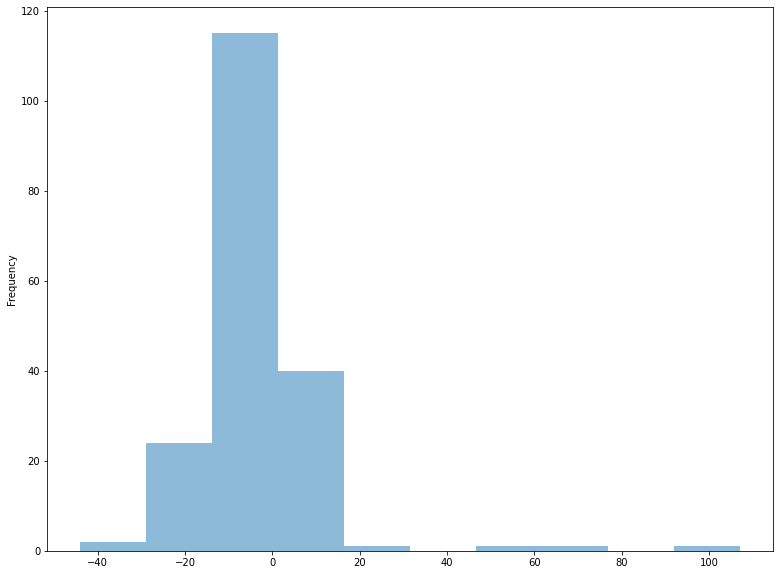

In [113]:
flight_group_df['arr_delay'].plot.hist(alpha=.5, figsize=(13,10))

<AxesSubplot:xlabel='month', ylabel='arr_delay'>

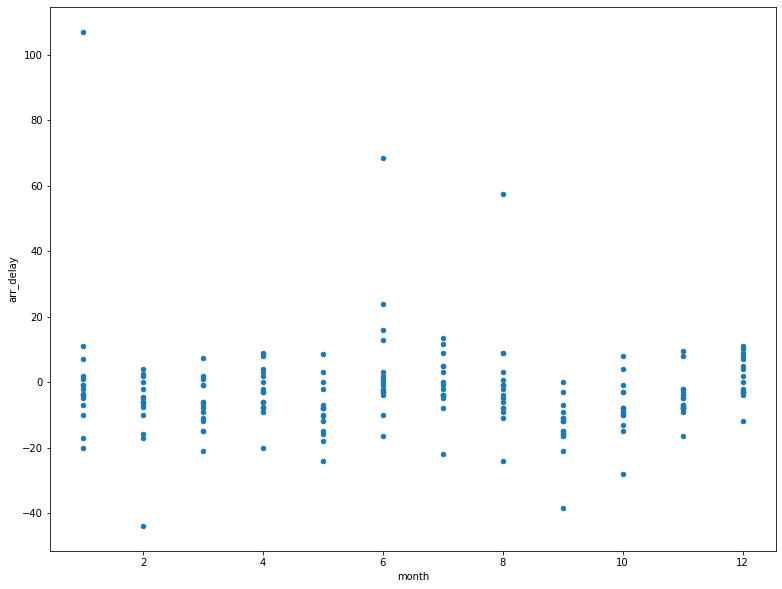

In [114]:
flight_df.plot.scatter(x='month', y='arr_delay', figsize=(13,10))

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

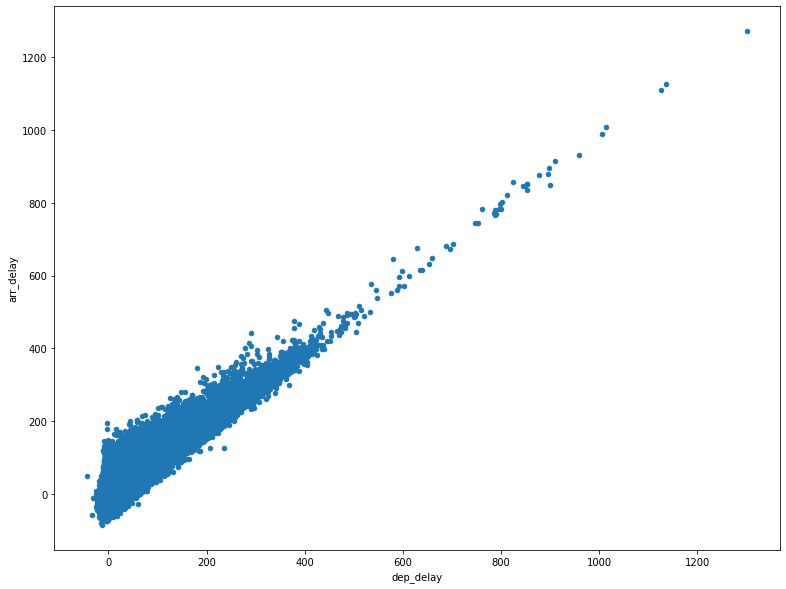

In [116]:
flight_df.plot.scatter(x='dep_delay', y='arr_delay', figsize=(13,10))

In [ ]:
flight_df.plot.boxplot(x='month', y='arr_delay', figsize=(13,10))